# Data Science Challenge "Trips"
### Author: Nisarg Dave
### Dev OS: Ubuntu Linux 16.04 LTS & macOS 10.13
### Tools: Jupyter Notebook (Anaconda Distribution)
### Language: Python 3.6

##  Step 1: Problem Defination

#### Question 1

-         Programmatically download and load into your favorite analytical tool the trip data for September 2015.
-         Report how many rows and columns of data you have loaded.

#### Question 2

-         Plot a histogram of the number of the trip distance ("Trip Distance").

-         Report any structure you find and any hypotheses you have about that structure.

#### Question 3

-         Report mean and median trip distance grouped by hour of day.

-         We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

#### Question 4

-         Build a derived variable for tip as a percentage of the total fare.
 
-         Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

#### Question 5

Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel best suits your particular skills and/or expertise. If you answer more than one, only the first will be scored.

####         Option A: Distributions

-    Build a derived variable representing the average speed over the course of a trip.

-    Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

-    Can you build up a hypothesis of average trip speed as a function of time of day?

### Step 1.1: Understanding the Problem

#### Firstof all, I'll perform the Data munging & I'll perform data exploration on the dataset. Understanding the dataset will help me in solving my problem easily. Data should be cleaned and it's real world dataset so I think I need to go step by step in data science project lifecycle.

(Dataset is from September 2015 and It's all about Green Taxi data (Green taxis are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan.)  

### Step 2: Data Munging or Wrangling

### Answer of Question 1: Programmatically collect the data & show the number of rows and columns.
#### Let's check whether dataset exists on local path, if it doesn't exist then let's download it from the given link.

In [1]:
#let's do some important task to ignore warning.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd #for loading data into dataframe
import os #for checking the file on local system

# is data on local disk?
if os.path.exists('green tripdata.csv'): 
    greentrip_db = pd.read_csv('green tripdata.csv')
else: 
    #not? then download it.
    url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
    greentrip_db = pd.read_csv(url)
    #we need to specify which element is actual filename on path so we used split from / and retrieving the filename.
    greentrip_db.to_csv(url.split('/')[-1])
print("The number of Rows and Columns in the Dataset is displayed below")
#showing number of Rows
print("Total Number of rows in Green Taxi data of September 2015:", greentrip_db.shape[0])
#showing number of columns
print ("Total Number of columns in Green Taxi data of September 2015: ", greentrip_db.shape[1])

The number of Rows and Columns in the Dataset is displayed below
Total Number of rows in Green Taxi data of September 2015: 1494926
Total Number of columns in Green Taxi data of September 2015:  21


#### Getting Data
-  I've downloaded the CSV file of data from (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)
-  I've loaded the data from local CSV file using Pandas for Python.

## Let's play with data! It's fun to play with datasets :P
### Part 2.1: Data Understanding
#### Playing with data to understand it or understanding what it's all about?

In [3]:
#displaying columns and rows to understand the attributes.
print(greentrip_db.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


#### Well, I could get to know about some features in my first skimming but i couldn't get all. The data dictionary of this data is available at official website. So I had a look into data dictonary and I understood all the features of data. Now I'm sharing what I initially understood out of the data.

### Basic Description of Data & Exploration
 -  Data is from September 2015 for the Green Taxis 
 -  Data contains 1494925 Rows in total
 -  Total number of features(columns) are 20.
     -  Feature set includes,
         1.  **VendorID**: 1= Creative Mobile Technologies, LLC   2= VeriFone Inc.
         2.  **lpep_pickup_datetime**: date & time when meter started
         3.  **Lpep_dropoff_datetime**: date & time when meter resetted.
         4.  **Store_and_fwd_flg**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
         -  **RateCodeID**:
         
                1= Standard rate
                2=JFK
                3=Newark
                4=Nassau or Westchester
                5=Negotiated fare
                6=Group ride
                
         -  **Pickup_longitude**: longitude at start of ride
         -  **Pickup_latitude**: latitude at start of ride
         -  **Dropoff_longitude**: longitude at end of ride
         -  **Dropoff_latitude**: latitude at end of ride
         -  **Passenger_count**: the total number of passenger in each ride.
         -  **Fare_amount**: total fare calculated
         -  **Extra**: extra charge (only the \$ 0.50 and \$ 1 rush hour and overnight charges.)
         -  **MTA_tax**: \$ 0.50 MTA tax that is automatically triggered based on the metered rate in use.
         -  **Tip_amount**: tip given to driver.
         -  **Tolls_amount**: tolls paid
         -  **Ehail_fee**: 
         -  **Improvement_surcharge**: \$ 0.30 improvement surcharge assessed on hailed trips at the flag drop.The improvement surcharge began being levied in 2015.
         -  **Total_amount**: total charge of trip
         -  **Payment_type**: A numeric code signifying how the passenger paid for the trip.
                                
                                1= Credit card
                                2= Cash
                                3= No charge
                                4= Dispute
                                5= Unknown
                                6= Voided trip
         -  **Trip_type**: A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
                       
                                1= Street-hail
                                2= Dispatch

In [4]:
#exploring data in starting
greentrip_db.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [5]:
#exploring data in ending
greentrip_db.tail(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,...,30.5,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,...,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,...,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0
1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,1,-73.966110,40.681351,-73.955452,40.691002,1,...,6.5,0.5,0.5,1.00,0.0,NaN,0.3,8.80,1,1.0


In [6]:
#basic stats of data (not so useful)
greentrip_db.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


###  Finding 1: Ehail_fee is totally useless column so we need to remove that during the data cleaning process.

In [7]:
#learning about the datatypes of data
greentrip_db.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

### Finding 2: 3 features are in Object form so I need to encode them into numerical ones for performing operations. 

In [8]:
print("Is feature 'VendorID' has missing/null values? - %s " %greentrip_db['VendorID'].isnull().values.any())
print("Is feature 'lpep_pickup_datetime' has missing/null values? - %s " %greentrip_db['lpep_pickup_datetime'].isnull().values.any())
print("Is feature 'Lpep_dropoff_datetime' has missing/null values? - %s " %greentrip_db['Lpep_dropoff_datetime'].isnull().values.any())
print("Is feature 'RateCodeID' has missing/null values? - %s " %greentrip_db['RateCodeID'].isnull().values.any())
print("Is feature 'Pickup_longitude' has missing/null values? - %s " %greentrip_db['Pickup_longitude'].isnull().values.any())
print("Is feature 'Pickup_latitude' has missing/null values? - %s " %greentrip_db['Pickup_latitude'].isnull().values.any())
print("Is feature 'Dropoff_longitude' has missing/null values? - %s " %greentrip_db['Dropoff_longitude'].isnull().values.any())
print("Is feature 'Dropoff_latitude' has missing/null values? - %s " %greentrip_db['Dropoff_latitude'].isnull().values.any())
print("Is feature 'Passenger_count' has missing/null values? - %s " %greentrip_db['Passenger_count'].isnull().values.any())
print("Is feature 'Trip_distance' has missing/null values? - %s " %greentrip_db['Trip_distance'].isnull().values.any())
print("Is feature 'Fare_amount' has missing/null values? - %s " %greentrip_db['Fare_amount'].isnull().values.any())
print("Is feature 'Extra' has missing/null values? - %s " %greentrip_db['Extra'].isnull().values.any())
print("Is feature 'MTA_tax' has missing/null values? - %s " %greentrip_db['MTA_tax'].isnull().values.any())
print("Is feature 'Tip_amount' has missing/null values? - %s " %greentrip_db['Tip_amount'].isnull().values.any())
print("Is feature 'Tolls_amount' has missing/null values? - %s " %greentrip_db['Tolls_amount'].isnull().values.any())
print("Is feature 'improvement_surcharge' has missing/null values? - %s " %greentrip_db['improvement_surcharge'].isnull().values.any())
print("Is feature 'Total_amount' has missing/null values? - %s " %greentrip_db['Total_amount'].isnull().values.any())
print("Is feature 'Payment_type' has missing/null values? - %s " %greentrip_db['Payment_type'].isnull().values.any())
print("Is feature 'Trip_type' has missing/null values? - %s " %greentrip_db['Trip_type '].isnull().values.any())

#print(greentrip_db['Trip_type '])

Is feature 'VendorID' has missing/null values? - False 
Is feature 'lpep_pickup_datetime' has missing/null values? - False 
Is feature 'Lpep_dropoff_datetime' has missing/null values? - False 
Is feature 'RateCodeID' has missing/null values? - False 
Is feature 'Pickup_longitude' has missing/null values? - False 
Is feature 'Pickup_latitude' has missing/null values? - False 
Is feature 'Dropoff_longitude' has missing/null values? - False 
Is feature 'Dropoff_latitude' has missing/null values? - False 
Is feature 'Passenger_count' has missing/null values? - False 
Is feature 'Trip_distance' has missing/null values? - False 
Is feature 'Fare_amount' has missing/null values? - False 
Is feature 'Extra' has missing/null values? - False 
Is feature 'MTA_tax' has missing/null values? - False 
Is feature 'Tip_amount' has missing/null values? - False 
Is feature 'Tolls_amount' has missing/null values? - False 
Is feature 'improvement_surcharge' has missing/null values? - False 
Is feature 'Tot

### Finding 3: After checking all the columns, only Trip_type has null/missing values so we need to impute the values.
#### Let's check which is the best option for imputing.

In [9]:
#finding mode for judging which option should we impute
from scipy.stats import mode
print("Most Occuring value for Trip_type feature")
mode(greentrip_db['Trip_type '])

Most Occuring value for Trip_type feature


ModeResult(mode=array([ 1.]), count=array([1461506]))

#### Most occuring value for RateCodeID

In [10]:
mode(greentrip_db['RateCodeID'])

ModeResult(mode=array([1]), count=array([1454464]))

#### Most occuring value for Extra field

In [11]:
mode(greentrip_db['Extra'])

ModeResult(mode=array([ 0.]), count=array([684524]))

#### So Option 1 for Trip_type occurs the most.mode(greentrip_db['Trip_type '])

### Finding 3: Trip_type has null or missing values so we need to impute values

In [12]:
#filtering bogus data
RateCodeID_filter = greentrip_db[greentrip_db['RateCodeID'] == 5]
print("Total number of Rate code ID with bogus values (unknown) are %d " %RateCodeID_filter.shape[0])

Total number of Rate code ID with bogus values (unknown) are 33943 


#### Finding 4: we need to replace this 'Unknown' or invalid data for RateCodeID and Extra

## Let's Create fix for our 4 findings using Data Cleaning!
## Part 3: Data Cleaning
#### Let's clean our whole data and make it more qualititive for better predictive analytics.

#### Dropping the Ehail_fee column

In [13]:
if 'Ehail_fee' in greentrip_db.columns:
        greentrip_db.drop('Ehail_fee',axis=1,inplace=True)

#### Replacing 'Trip_type' feature's NaN values using the mode (most occurring value) 1.

In [14]:
import numpy as np

greentrip_db['Trip_type '] = greentrip_db['Trip_type '].replace(np.NaN,1)

#### Making negative value to be replaced by their absolute
#### Certain features should not contain negative values

In [15]:
#getting rid of negatives
greentrip_db.Total_amount = greentrip_db.Total_amount.abs()
greentrip_db.Fare_amount = greentrip_db.Fare_amount.abs()
greentrip_db.improvement_surcharge = greentrip_db.improvement_surcharge.abs()
greentrip_db.Tip_amount = greentrip_db.Tip_amount.abs()
greentrip_db.Tolls_amount = greentrip_db.Tolls_amount.abs()
greentrip_db.MTA_tax = greentrip_db.MTA_tax.abs()

#### Replacing Bogus values in RateCodeID with the most frequent one

In [16]:
indices_oi = greentrip_db[~((greentrip_db.RateCodeID>=1) & (greentrip_db.RateCodeID<=6))].index
greentrip_db.loc[indices_oi, 'RateCodeID'] = 1

####  Replacing extra values using most frequent '0' 

In [17]:
indices_oi = greentrip_db[~((greentrip_db.Extra==0) | (greentrip_db.Extra==0.5) | (greentrip_db.Extra==1))].index
greentrip_db.loc[indices_oi, 'Extra'] = 0

#### Finding median of Total_amount for replacing the values below minimum charge.
#### As per the website, the minimum charge on entry is 2.5 Dollars so replacing small values by median of 11.76 

In [18]:
import statistics

#calculating median
statistics.median(greentrip_db['Total_amount'])

11.76

In [19]:
#getting indices which is relevant to our condition
indices_oi = greentrip_db[(greentrip_db.Total_amount<2.5)].index
greentrip_db.loc[indices_oi,'Total_amount'] = 11.76

#### Let's encode the categorical Objects to numerical ones

In [20]:
if greentrip_db.Store_and_fwd_flag.dtype.name != 'int64':
    greentrip_db['Store_and_fwd_flag'] = (greentrip_db.Store_and_fwd_flag=='Y')*1

#### Renaming the columns

In [21]:
greentrip_db.rename(columns={'lpep_pickup_datetime':'Pickup_date','Lpep_dropoff_datetime':'Dropoff_date'},inplace=True)

#### Getting updated names of columns

In [22]:
greentrip_db.columns

Index(['VendorID', 'Pickup_date', 'Dropoff_date', 'Store_and_fwd_flag',
       'RateCodeID', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type '],
      dtype='object')

#### Converting format of date & time 

In [23]:
import datetime as dt

greentrip_db['Pickup_date'] = greentrip_db.Pickup_date.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
greentrip_db['Dropoff_date'] = greentrip_db.Dropoff_date.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

## Part 4: Feature Engineering

### Extracting Important features,
        -  Week
        -  Day of Week
        -  Day of month
        -  Hour
        -  Working Shift
        -  Trip Duration
        -  Speed
        -  Total percentage of Tip

#### Obtaining the Week, day of week, day of month and hour of day!
Assumption: Taking first week of september as a reference

In [24]:
ref_week = dt.datetime(2015,9,1).isocalendar()[1]
greentrip_db['Week'] = greentrip_db.Pickup_date.apply(lambda x:x.isocalendar()[1])-ref_week+1
greentrip_db['Week_day']  = greentrip_db.Pickup_date.apply(lambda x:x.isocalendar()[2])
greentrip_db['Month_day'] = greentrip_db.Pickup_date.apply(lambda x:x.day)
greentrip_db['Hour'] = greentrip_db.Pickup_date.apply(lambda x:x.hour)

#### let's devide the data into 3 time shifts 1. (7 am to 3 pm) 2. (3 pm to 11 pm) 3. (11 pm to 7 am)


In [25]:
greentrip_db['Shift_type'] = np.NAN
greentrip_db.loc[greentrip_db[(greentrip_db.Hour>=7) & (greentrip_db.Hour<15)].index,'Shift_type'] = 1
greentrip_db.loc[greentrip_db[(greentrip_db.Hour>=15) & (greentrip_db.Hour<23)].index,'Shift_type'] = 2
greentrip_db.loc[greentrip_db[greentrip_db.Shift_type.isnull()].index,'Shift_type'] = 3

#### Deriving the total time lapse of trip -> total duration

In [26]:
greentrip_db['Trip_duration'] = ((greentrip_db.Dropoff_date-greentrip_db.Pickup_date).apply(lambda x:x.total_seconds()/60.))

#### Direction counting for North to South to each instance.

In [27]:
greentrip_db['Direction_NS'] = (greentrip_db.Pickup_latitude>greentrip_db.Dropoff_latitude)*1+1
indices = greentrip_db[(greentrip_db.Pickup_latitude == greentrip_db.Dropoff_latitude) & (greentrip_db.Pickup_latitude!=0)].index
greentrip_db.loc[indices,'Direction_NS'] = 0

#### Direction counting for East to West to each instance.

In [28]:
greentrip_db['Direction_EW'] = (greentrip_db.Pickup_longitude>greentrip_db.Dropoff_longitude)*1+1
indices = greentrip_db[(greentrip_db.Pickup_longitude == greentrip_db.Dropoff_longitude) & (greentrip_db.Pickup_longitude!=0)].index
greentrip_db.loc[indices,'Direction_EW'] = 0

#### Getting the Speed feature in mph

In [29]:
greentrip_db['Speed_mph'] = greentrip_db.Trip_distance/(greentrip_db.Trip_duration/60)

#### Does it contais Null values?

In [30]:
print("Is feature 'Speed_mph' has missing/null values? - %s " %greentrip_db['Speed_mph'].isnull().values.any())

Is feature 'Speed_mph' has missing/null values? - True 


#### Calculating Standard deviation & mean of speed for imputing NaN values

In [31]:
print("Mean of the speed is %f " %statistics.mean(greentrip_db['Speed_mph']))
print("Standard Deviation of the speed is %f" %np.std(greentrip_db['Speed_mph'],ddof=1))

Mean of the speed is nan 
Standard Deviation of the speed is nan


#### Replacing values in Speed_mph according to normal distribution

In [32]:
indices_oi = greentrip_db[(greentrip_db.Speed_mph.isnull()) | (greentrip_db.Speed_mph>240)].index
greentrip_db.loc[indices_oi,'Speed_mph'] = np.abs(np.random.normal(loc=12.9,scale=7.0,size=len(indices_oi)))

#### Now let's obtain the bounding points of upper manhattan using http://boundingbox.klokantech.com/ 
#### Map it into another list which contains bounds.

In [33]:
#bounding box
upper_manhattan_bounding_box = [(40.796937, -73.949503),(40.787945, -73.955822),(40.782772, -73.943575),
              (40.794715, -73.929801),(40.811261, -73.934153),(40.835371, -73.934515),
              (40.868910, -73.911145),(40.872719, -73.910765),(40.878252, -73.926350),
              (40.850557, -73.947262),(40.836225, -73.949899),(40.806050, -73.971255)]

#### Using Shapely library to find the geo coordinates which fits into the upper manhattan region of the dataset.

In [34]:
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon

#mapping the point into box
poi = Polygon(upper_manhattan_bounding_box)
def is_within_bbox(loc,poi=poi):
    return 1*(Point(loc).within(poi))

#### Finding the Origin point of each and every trip using pickup logitude and latitude and applying the fn to check whether it's in mapped region or not?

In [35]:
#checking origin
print("Finding Origin of Trip")
greentrip_db['upper_manhattan'] = greentrip_db[['Pickup_latitude','Pickup_longitude']].apply(lambda r:is_within_bbox((r[0],r[1])),axis=1)

Finding Origin of Trip


#### Finding the tip percentage and with tip attribute

In [36]:
greentrip_db['Tip_percentage'] = 100*greentrip_db.Tip_amount/greentrip_db.Total_amount
greentrip_db['With_tip'] = (greentrip_db.Tip_percentage>0)*1

In [37]:
#total features
print("Number of features before feature engineering", 21)
print ("Number of features after feature engineering", greentrip_db.shape[1])

Number of features before feature engineering 21
Number of features after feature engineering 32


In [38]:
#checking updated columns
greentrip_db.columns

Index(['VendorID', 'Pickup_date', 'Dropoff_date', 'Store_and_fwd_flag',
       'RateCodeID', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type ', 'Week', 'Week_day', 'Month_day', 'Hour', 'Shift_type',
       'Trip_duration', 'Direction_NS', 'Direction_EW', 'Speed_mph',
       'upper_manhattan', 'Tip_percentage', 'With_tip'],
      dtype='object')

### Let's have a look on Data After feature engineering.

In [39]:
#checking data after feature engg
greentrip_db.head(5)

,VendorID,Pickup_date,Dropoff_date,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Month_day,Hour,Shift_type,Trip_duration,Direction_NS,Direction_EW,Speed_mph,upper_manhattan,Tip_percentage,With_tip
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,0,5,-73.979485,40.684956,-73.979431,40.685020,1,...,1,0,3.0,0.066667,1,1,0.000000,0,20.00000,1
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,0,5,-74.010796,40.912216,-74.010780,40.912212,1,...,1,0,3.0,0.066667,2,1,0.000000,0,0.00000,0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,0,1,-73.921410,40.766708,-73.914413,40.764687,1,...,1,0,3.0,2.566667,2,1,13.792208,0,8.62069,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,0,1,-73.921387,40.766678,-73.931427,40.771584,1,...,1,0,3.0,4.100000,1,2,10.829268,0,0.00000,0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,0,1,-73.955482,40.714046,-73.944412,40.714729,1,...,1,0,3.0,4.100000,1,1,8.926829,0,0.00000,0


## Answer for Question 2: Plotting the Histogram of trip_distance

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline  

from scipy import stats

### Histogram of  the number of the trip distance

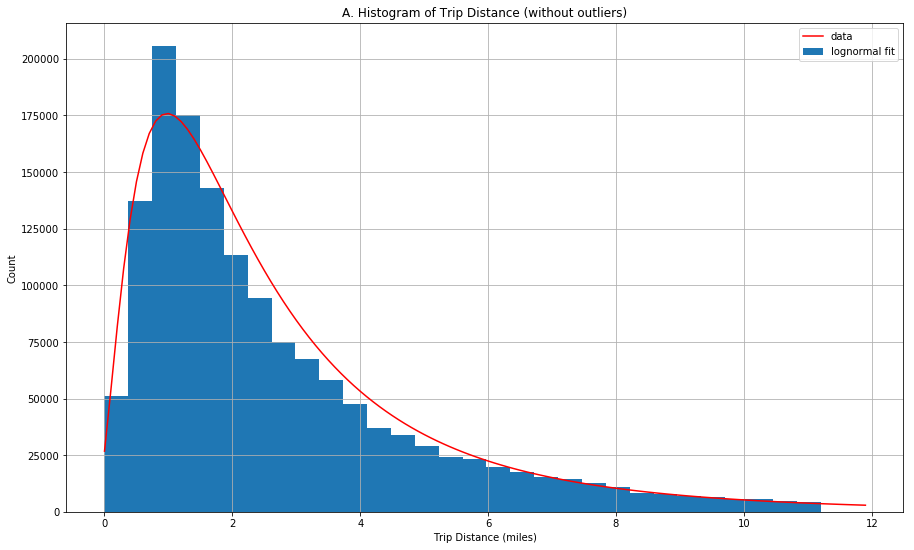

In [41]:
fig = plt.subplots(figsize = (15,9)) 
# histogram of the number of trip distance
x = greentrip_db.Trip_distance 

#excluding the outliers
x[~((x-x.median()).abs()>3*x.std())].hist(bins=30) # 
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Count')
plt.title('A. Histogram of Trip Distance (without outliers)')

#fitting the lognormal curve
scatter,loc,mean = stats.lognorm.fit(greentrip_db.Trip_distance.values,
                               scale=greentrip_db.Trip_distance.mean(),
                               loc=0)
pdf_fitted = stats.lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)
plt.plot(np.arange(0,12,.1),600000*pdf_fitted,'r') 
plt.legend(['data','lognormal fit'])
plt.show()

## Comment:

### The trip distance is asymmetrically distributed and It's right skewed. so the median is smaller than the mean. The structure here is 'Lognormal'

### The derivation: It declares the non Gaussian distribution so it's not random in nature otherwise it should be gaussian.

## Answer for Question 3: Reporting Mean and median trip distance grouped by hour of day

In [42]:
greentrip_db['Pickup_hour'] = greentrip_db.Pickup_date.apply(lambda x:x.hour)

In [43]:
from tabulate import tabulate

pickuphr_groupby = greentrip_db.pivot_table(index='Pickup_hour', values='Trip_distance',aggfunc=('mean','median')).reset_index()
pickuphr_groupby.columns = ['Hour','Mean_distance','Median_distance']
print(tabulate(pickuphr_groupby.values.tolist(),["Hour","Mean distance","Median distance"]))

  Hour    Mean distance    Median distance
------  ---------------  -----------------
     0          3.11528               2.2
     1          3.01735               2.12
     2          3.04618               2.14
     3          3.21295               2.2
     4          3.52656               2.36
     5          4.13347               2.9
     6          4.05515               2.84
     7          3.28439               2.17
     8          3.04845               1.98
     9          2.99911               1.96
    10          2.94448               1.92
    11          2.91202               1.88
    12          2.90306               1.89
    13          2.87829               1.84
    14          2.8643                1.83
    15          2.85704               1.81
    16          2.77985               1.8
    17          2.67911               1.78
    18          2.65322               1.8
    19          2.7156                1.85
    20          2.77705               1.9
    21          2


### The rush in the morning is higher. May be people used to take cabs more in the morning due to work. In the evening it's less so people surely uses the other alternative! may be the public transport or carpool.

### Identifying trips that originate or terminate at one of the NYC area airports.
### Finding
           -  number of Transactions
           -  Mean fare
           -  Mean total charge

In [44]:
#selecting the trips from airports
ori_airtrips = greentrip_db[(greentrip_db.RateCodeID==2) | (greentrip_db.RateCodeID==3)]

In [45]:
print("Number of trips to/from NYC airports: ", ori_airtrips.shape[0])
print("Average fare (calculated by the meter) of trips to/from NYC airports: $", ori_airtrips.Fare_amount.mean(),"per trip")
print("Average total charged amount (before tip) of trips to/from NYC airports: $", ori_airtrips.Total_amount.mean(),"per trip")

Number of trips to/from NYC airports:  5552
Average fare (calculated by the meter) of trips to/from NYC airports: $ 51.36671469740634 per trip
Average total charged amount (before tip) of trips to/from NYC airports: $ 59.68271433717384 per trip


In [46]:
data = greentrip_db

# Solution for Question 4: Predictive Modelling

#### Derived variable of Tip as per of Total Fare

In [47]:
data['Tip_percentage'].describe()

count    1.494926e+06
mean     6.634870e+00
std      8.867740e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: Tip_percentage, dtype: float64

# Building the Random Forest Regression Model
### I've used Random Forest regressor because,
            -  It's very easy to tune
            -  I can start with any number of trees in forest. (overfitting isn't there due to this)
            -  You can interpret them by probing the tree sturcture
            -  You can reduce the number of trees till desired accuracy!
            -  They're not so much data intensive

In [48]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import random

/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [49]:
#optimizing our model
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_, gs.scorer_)
    print("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

### Spliting Data into Train & test set

In [50]:
#getting train & test set
train_set, test_set = train_test_split(range(data.shape[0]), train_size=0.8)
mask=np.ones(data.shape[0], dtype='int')
mask[train_set]=1
mask[test_set]=0
mask = (mask==1)
mask[:10]

array([ True,  True, False,  True,  True, False,  True,  True, False,  True], dtype=bool)

### Assigning the predictors or important features to the data.

In [52]:
# Split off the features
Xnames = ['VendorID', 'Passenger_count', 'Trip_distance', 'Total_amount', 
              'Extra', 'MTA_tax', 'Tolls_amount', 'Payment_type', 
              'Hour', 'upper_manhattan', 'Week', 'Week_day', 'Month_day', 'Shift_type', 
              'Direction_NS', 'Direction_EW', 'Trip_duration', 'Speed_mph']
#'VendorID', 'Store_and_fwd_flag','RateCodeID','Passenger_count','Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax','Tolls_amount', 'improvement_surcharge','Payment_type', 'Trip_type ', 'Week', 'Week_day', 'Month_day', 'Hour', 'Shift_type','Trip_duration', 'Direction_NS', 'Direction_EW', 'Speed_mph','upper_manhattan', 'Pickup_hour','With_tip' ,'Total_amount','Tip_percentage','Tip_amount'
#Xnames = ['Total_amount','Tip_amount']
X = data[Xnames]
y = np.log10(data['Tip_amount']+1)

### Masking the train and test set.

In [53]:
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
n_samples = Xtrain.shape[0]
n_features = Xtrain.shape[1]
print(Xtrain.shape)
max_samples = 1000000
if Xtrain.shape[0] > max_samples:
    rows = random.sample(list(Xtrain.index),max_samples)
    Xtrain = Xtrain.ix[rows]
    ytrain = ytrain.ix[rows]
    
print (Xtrain.shape)
Xtrain.head()

(1195940, 18)
(1000000, 18)


,VendorID,Passenger_count,Trip_distance,Total_amount,Extra,MTA_tax,Tolls_amount,Payment_type,Hour,upper_manhattan,Week,Week_day,Month_day,Shift_type,Direction_NS,Direction_EW,Trip_duration,Speed_mph
1195440,2,1,3.59,19.8,0.0,0.5,0.0,1,7,0,4,5,25,1.0,1,2,22.466667,9.587537
33847,2,1,1.73,11.3,0.5,0.5,0.0,2,20,0,1,2,1,2.0,1,2,12.133333,8.554945
132711,2,1,12.90,49.3,0.5,0.5,0.0,2,23,0,1,4,3,3.0,2,2,53.650000,14.426841
648471,2,1,3.56,15.3,0.0,0.5,0.0,2,18,1,2,7,13,2.0,2,2,17.650000,12.101983
395271,2,1,1.28,7.3,0.0,0.5,0.0,2,9,0,2,3,9,1.0,2,1,5.066667,15.157895


### Running Regressor estimator for parameter estimation of our random forest regressor.

In [54]:
estimator = RandomForestRegressor(n_estimators=20, n_jobs=-1)

In [55]:
#defining the parameters

parameters = {"n_estimators": [50],
              "max_features": ["auto"],
              "max_depth": [50]}
best = cv_optimize(estimator, parameters, Xtrain, ytrain, n_folds=5, score_func='mean_squared_error', verbose=3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.002822 - 1.6min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.002833 - 1.8min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s
/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.002853 - 1.7min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.002908 - 1.6min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/home/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.002808 - 1.7min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.3min finished


BEST {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} -0.0028450319919672896 [mean: -0.00285, std: 0.00003, params: {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50}] make_scorer(mean_squared_error, greater_is_better=False)
Best score:  -0.0028450319919672896


### Fitting the Machine learning model using training set

In [56]:
reg=best.fit(Xtrain, ytrain)
training_accuracy = reg.score(Xtrain, ytrain)
test_accuracy = reg.score(Xtest, ytest)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.9955
R^2 on test data:     0.9691


### Finding the accuracy parameters & validating results 

In [57]:
np.round(np.power(10,np.column_stack((reg.predict(Xtest),ytest))) - 1,decimals=0).astype(int)

array([[0, 0],
       [1, 1],
       [1, 1],
       ..., 
       [0, 0],
       [0, 0],
       [0, 0]])

### Calculating the Mean Square Error

In [58]:
rmse = np.sqrt(mean_squared_error(reg.predict(Xtest),ytest))
print ("RMSE = %0.3f (this is in log-space!)" % rmse)
print ("So two thirds of the records would be a factor of less than %0.2f away from the real value." % np.power(10,rmse))

RMSE = 0.053 (this is in log-space!)
So two thirds of the records would be a factor of less than 1.13 away from the real value.


In [93]:
result = greentrip_db[Xnames]

## Predicting the Values & adding it to our dataframe

In [94]:
result['predicted_Tip_amount'] = np.power(10,reg.predict(result)) - 1

### Displaying the results

In [97]:
result['Actual_Tip_amount'] = greentrip_db['Tip_amount']
result.head()

,VendorID,Passenger_count,Trip_distance,Total_amount,Extra,MTA_tax,Tolls_amount,Payment_type,Hour,upper_manhattan,Week,Week_day,Month_day,Shift_type,Direction_NS,Direction_EW,Trip_duration,Speed_mph,predicted_Tip_amount,Actual_Tip_amount
0,2,1,0.00,9.75,0.0,0.0,0.0,1,0,0,1,2,1,3.0,1,1,0.066667,0.000000,1.229049,1.95
1,2,1,0.00,45.00,0.0,0.0,0.0,1,0,0,1,2,1,3.0,2,1,0.066667,0.000000,0.492635,0.00
2,2,1,0.59,5.80,0.5,0.5,0.0,1,0,0,1,2,1,3.0,2,1,2.566667,13.792208,0.145566,0.50
3,2,1,0.74,6.30,0.5,0.5,0.0,2,0,0,1,2,1,3.0,1,2,4.100000,10.829268,0.000000,0.00
4,2,1,0.61,6.30,0.5,0.5,0.0,2,0,0,1,2,1,3.0,1,1,4.100000,8.926829,0.000000,0.00


### Showing Actual & predicted tip values separately

In [103]:
predictions = result[['predicted_Tip_amount','Actual_Tip_amount']]
predictions.head(50)

,predicted_Tip_amount,Actual_Tip_amount
0,1.229049e+00,1.95
1,4.926350e-01,0.00
2,1.455656e-01,0.50
3,0.000000e+00,0.00
4,0.000000e+00,0.00
5,1.360000e+00,1.36
6,3.010691e-07,0.00
7,0.000000e+00,0.00
8,1.460000e+00,1.46
9,0.000000e+00,0.00


## Solution for Question 5
### Option A : Distributions

#### Derivable variable for mean speed
#### I've already derived speed variable on the feature engineering part and now I'm just describing important stats about that!


In [62]:
greentrip_db['Speed_mph'].describe()

count    1.494926e+06
mean     1.291291e+01
std      7.000670e+00
min      0.000000e+00
25%      9.308707e+00
50%      1.176238e+01
75%      1.504964e+01
max      2.400000e+02
Name: Speed_mph, dtype: float64

### Visualisation of Average speed or time

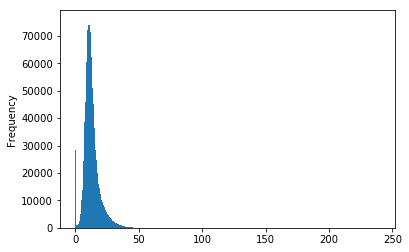

In [63]:
greentrip_db['Speed_mph'].plot.hist(bins=500)
plt.show()

### Performing the test

In [64]:
greentrip_db['Week'].value_counts()

2    364078
3    360212
4    339110
1    299398
5    132128
Name: Week, dtype: int64

In [65]:
week_1 = greentrip_db['Speed_mph'][greentrip_db['Week']==1].as_matrix()
week_2 = greentrip_db['Speed_mph'][greentrip_db['Week']==2].as_matrix()
week_3 = greentrip_db['Speed_mph'][greentrip_db['Week']==3].as_matrix()
week_4 = greentrip_db['Speed_mph'][greentrip_db['Week']==4].as_matrix()
week_5 = greentrip_db['Speed_mph'][greentrip_db['Week']==5].as_matrix()

In [66]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=720.58292843824279, pvalue=0.0)

### The ANOVA test indicates the large f-value and small p value. so null hypothesis will get rejected and we states that differences are statistically significant so week number isn't related to the speed.
#### Another interesting question is how the speed changes over the course of the day. In this case I use  one-way anova test on multiple samples. We find that the speed is different in different hours with a zero pvalue of the anova test.
Now I'll calculate other statistical parameters like mean,median and std.

In [67]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())

13.3603828087 12.6907266109 12.6853896377 13.1619742087 12.4922080919


In [68]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))

12.0848056537 11.575562701 11.5979381443 12.0 11.3940570756


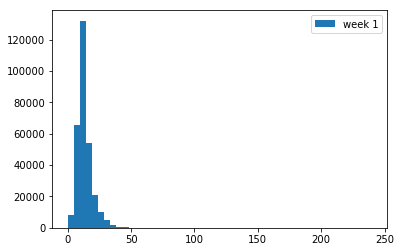

In [69]:
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.show()

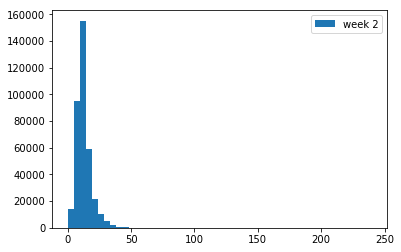

In [70]:
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.show()

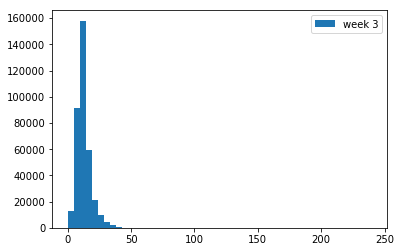

In [71]:
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.show()

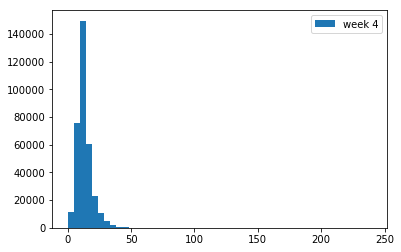

In [72]:
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.show()

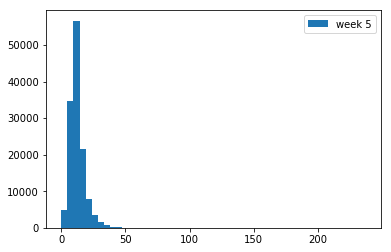

In [73]:
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.show()

In [74]:
grouped = greentrip_db.groupby('Pickup_hour')
samples = []

for name,group in grouped:
    samples.append(group['Speed_mph'])

In [75]:
sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=3386.0111366052874, pvalue=0.0)

### ANOVA test still gives the high F value and low p value and so we still reject the hypothesis and statistically significant difference between pickup hour and speed is there.

In [76]:
means = []
medians = []
for hour in range(24):
    means.append(statistics.mean(sample[hour]))
    #print('Mean:',statistics.mean(sample[hour]))
    medians.append(statistics.median(sample[hour]))
    #print('Median:',statistics.median(sample[hour]))

statis = pd.DataFrame(list(zip(means,medians)),columns=['Means','Medians'])
statis

,Means,Medians
0,14.623432,13.380663
1,14.898349,13.678855
2,15.046172,13.910240
3,15.430099,14.155175
4,16.284754,14.584419
5,18.041351,16.079075
6,17.074692,15.242718
7,13.556228,12.000000
8,12.333907,10.996016
9,12.644419,11.290909


### Let's understand more on test by plotting the Bar chart of average speed of a ride at hour

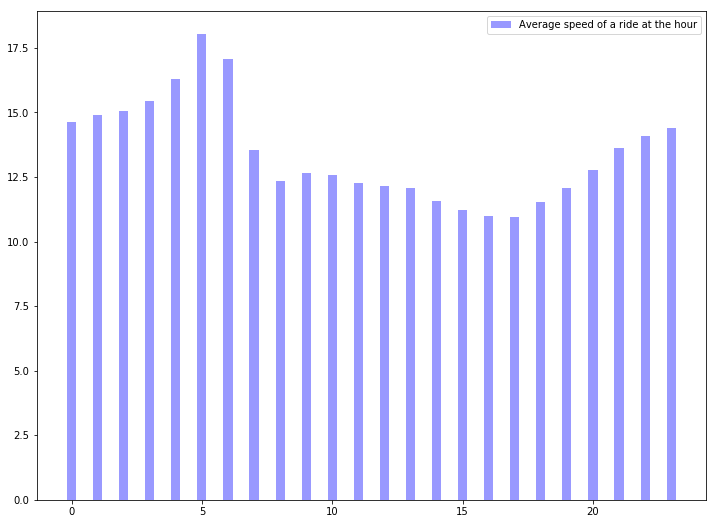

In [77]:
plt.rcParams["figure.figsize"] = [12,9]
index = np.arange(24)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Average speed of a ride at the hour')
plt.legend()
plt.show()

### Things I tried but I failed,
                  - I tried to visualize the borough traffic and NYC people's behavior but I coudn't
                  - I tried to Implement time series analysis for anomaly detection, for this I learned some of the analysis part but couldn't complete it.

### References,
                 - for data attributes : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml
                 - for Random Forest Regressor http://www.bios.unc.edu/~dzeng/BIOS740/randomforest.pdf
                 - for tabulate https://pypi.python.org/pypi/tabulate
                 - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Recommendations

- As a future work,I would use the other algorithms and compare those with the each and every one. The best way to achieve the optimization. My Model is still not optimized so I'll try to work on this for making better predictions using multivariate analysis.

- Moreover,I tried using Plotly for plotting interactive plots but i coudn't. The Notebook got crashed and it's not working due to less computation power.

### Personal comment: I enjoyed this Data challenge a lot. It was fun to working on real world dataset. I hope i answered the questions. I tried to make it more simpler. I did more on Data cleaning and feature engineering because it was necessary to answer the questions accurately and precisely.